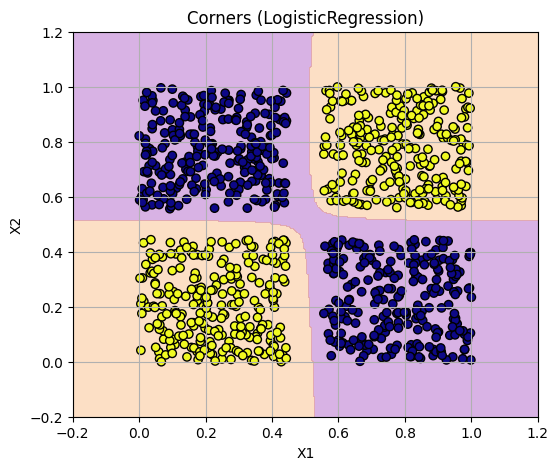

Accuracy: 100.00%


In [3]:
# import numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt

# make file for saving parameters
save_path = "my_saved_results/"

# degree 설정
degree = 6

# define func
def feature_mapping(X1, X2, degree):
    output = [np.ones(X1.shape[0])]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            output.append((X1 ** (i - j)) * (X2 ** j))
    return np.stack(output, axis=1)

def sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

# define class
class LogisticRegression:
    def __init__(self, lr=1.0, iteration=10000):
        self.lr = lr
        self.iteration = iteration

    def training(self, X_data, y):
        self.theta = np.zeros(X_data.shape[1])
        for _ in range(self.iteration):
            z = X_data @ self.theta
            h = sigmoid_func(z)
            gradient = X_data.T @ (h - y) / y.size
            self.theta -= self.lr * gradient

    def predict_prob(self, X_data):
        return sigmoid_func(X_data @ self.theta)

    def predict(self, X_data):
        return self.predict_prob(X_data) >= 0.5

    def get_parameters(self):
        return self.theta.copy()

# data
X_data = np.loadtxt("dataX.txt")
y = np.loadtxt("dataY.txt").astype(int)

# feature mapping / training
X_mapped = feature_mapping(X_data[:, 0], X_data[:, 1], degree=degree)
lr_model = LogisticRegression(lr=1, iteration=10000)
lr_model.training(X_mapped, y)

# saving parameters
np.save(save_path + "theta_corners.npy", lr_model.get_parameters())

# decision boundary visualization function
def decision_boundary_func(model, X_data, y, degree):
    x_min, x_max = X_data[:, 0].min() - 0.2, X_data[:, 0].max() + 0.2
    y_min, y_max = X_data[:, 1].min() - 0.2, X_data[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = feature_mapping(xx.ravel(), yy.ravel(), degree)
    probs = lr_model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, probs, cmap="plasma", alpha=0.3, levels=1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y, cmap="plasma", edgecolors='k')
    plt.title(f"Corners (LogisticRegression)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# visualization
decision_boundary_func(lr_model, X_data, y, degree)

# accuracy
y_pred = lr_model.predict(X_mapped)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")
